# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [293]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress,pearsonr

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count - they have to be 500+
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
print('Beginning Data Retrieval')
print('------------------------')
cities_data=[]
city_list = []
for x in range(len(cities)):
    #build query url
    queryurl = '{0}q={1}&appid={2}'.format(url,cities[x],weather_api_key)
    try:
        cities_data += [ requests.get(queryurl).json()]
        city_list +=[cities[x]]
        #city_data['Lat','Lng'] +=[cities_data['coord'][:]]
        print(f'Processing record {x+1} | {cities[x]}')
    except:
        print(f'City not found. ({cities[x]}) Skipping..')
print('-------------------')
print('Data Retrieval Complete')
print('-------------------')

Beginning Data Retrieval
------------------------
Processing record 1 | airai
Processing record 2 | qaanaaq
Processing record 3 | tuatapere
Processing record 4 | katsuura
Processing record 5 | sentyabrskiy
Processing record 6 | port blair
Processing record 7 | kruisfontein
Processing record 8 | hermanus
Processing record 9 | avarua
Processing record 10 | roma
Processing record 11 | moranbah
Processing record 12 | atuona
Processing record 13 | pascagoula
Processing record 14 | high level
Processing record 15 | camana
Processing record 16 | oneida
Processing record 17 | kapaa
Processing record 18 | severo-kurilsk
Processing record 19 | thompson
Processing record 20 | port lincoln
Processing record 21 | mys shmidta
Processing record 22 | saldanha
Processing record 23 | rikitea
Processing record 24 | puerto leguizamo
Processing record 25 | ushuaia
Processing record 26 | hithadhoo
Processing record 27 | mackay
Processing record 28 | vila velha
Processing record 29 | lopukhiv
Processing reco

Processing record 249 | lebu
Processing record 250 | sofiysk
Processing record 251 | havoysund
Processing record 252 | saskylakh
Processing record 253 | ferrol
Processing record 254 | gazni
Processing record 255 | ginda
Processing record 256 | kenai
Processing record 257 | narsaq
Processing record 258 | west wendover
Processing record 259 | vohibinany
Processing record 260 | fort nelson
Processing record 261 | guanica
Processing record 262 | chiredzi
Processing record 263 | shache
Processing record 264 | tsihombe
Processing record 265 | nyircsaholy
Processing record 266 | akyab
Processing record 267 | ca mau
Processing record 268 | namibe
Processing record 269 | baruun-urt
Processing record 270 | azanka
Processing record 271 | zhanakorgan
Processing record 272 | baracoa
Processing record 273 | eydhafushi
Processing record 274 | san jeronimo
Processing record 275 | jardim
Processing record 276 | moose factory
Processing record 277 | hambantota
Processing record 278 | popondetta
Processi

Processing record 496 | lardos
Processing record 497 | patrocinio
Processing record 498 | port augusta
Processing record 499 | rockland
Processing record 500 | lorengau
Processing record 501 | redcliffe
Processing record 502 | huarmey
Processing record 503 | mogadishu
Processing record 504 | cooma
Processing record 505 | arlit
Processing record 506 | sedelnikovo
Processing record 507 | lagoa
Processing record 508 | kaffrine
Processing record 509 | san vicente
Processing record 510 | yenagoa
Processing record 511 | itaituba
Processing record 512 | pimentel
Processing record 513 | tiksi
Processing record 514 | henties bay
Processing record 515 | rudnogorsk
Processing record 516 | muisne
Processing record 517 | magdagachi
Processing record 518 | chumikan
Processing record 519 | novyy yarychiv
Processing record 520 | champasak
Processing record 521 | riosucio
Processing record 522 | puerto lopez
Processing record 523 | talnakh
Processing record 524 | hay river
Processing record 525 | malwa

In [219]:
print('SAVING THE DATA OF INTEREST INTO A DATAFRAME')
print('--------------------------------------------')
name_list = []
lon_list = []
lat_list = []
T_list =[]
humidity = []
cloudiness = []
wind_speed = []
country_list = []
dte = []
counter = 0
for city in cities_data:
    city_name = city_list[counter].capitalize()
    try:
        print(f'Processing {city_name}')
        name_list += [city['name']]
        lon_list += [city['coord']['lon']]
        lat_list += [city['coord']['lat']]
        T_list +=[city['main']['temp_max']]
        humidity += [city['main']['humidity']]
        cloudiness +=[city['clouds']['all']]
        wind_speed +=[city['wind']['speed']]
        country_list += [city['sys']['country']]
        dte += [city['dt']]
    except:
        print(f'{city_name} was not found. Skipping ...')
    counter += 1

city_data = {'City': name_list,
            'Lon': lon_list,
            'Lat': lat_list,
            'Max Temp': T_list,
            'Humidity': humidity,
            'Cloudiness':cloudiness ,
             'Wind Speed': wind_speed,
             'Country': country_list,
             'Date': dte}
    
              

city_df = pd.DataFrame.from_dict(city_data)

SAVING THE DATA OF INTEREST INTO A DATAFRAME
--------------------------------------------
Processing Airai
Processing Qaanaaq
Processing Tuatapere
Processing Katsuura
Processing Sentyabrskiy
Sentyabrskiy was not found. Skipping ...
Processing Port blair
Processing Kruisfontein
Processing Hermanus
Processing Avarua
Processing Roma
Processing Moranbah
Processing Atuona
Processing Pascagoula
Processing High level
Processing Camana
Processing Oneida
Processing Kapaa
Processing Severo-kurilsk
Processing Thompson
Processing Port lincoln
Processing Mys shmidta
Mys shmidta was not found. Skipping ...
Processing Saldanha
Processing Rikitea
Processing Puerto leguizamo
Processing Ushuaia
Processing Hithadhoo
Processing Mackay
Processing Vila velha
Processing Lopukhiv
Processing Yining
Processing Cidreira
Processing Albany
Processing Bluff
Processing Bathsheba
Processing Mount isa
Processing Berdigestyakh
Processing Hilo
Processing Vao
Processing Kralendijk
Processing Abu kamal
Processing Bandarbe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [220]:
city_df.to_csv(output_data_file,index=False)

In [221]:
city_df.head(20)

,City,Lon,Lat,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Airai,125.4092,-8.9266,289.42,100,98,2.01,TL,1612381346
1,Qaanaaq,-69.3632,77.4840,243.43,68,73,1.25,GL,1612381239
2,Tuatapere,167.6833,-46.1333,283.62,76,35,3.09,NZ,1612381245
3,Katsuura,140.3000,35.1333,277.15,45,20,1.54,JP,1612381302
4,Port Blair,92.7500,11.6667,297.76,77,100,4.32,IN,1612381296
5,Kruisfontein,24.7314,-34.0033,295.37,76,7,1.34,ZA,1612381242
6,Hermanus,19.2345,-34.4187,291.48,84,1,2.33,ZA,1612381231
7,Avarua,-159.7750,-21.2078,302.15,74,20,3.60,CK,1612381278
8,Rome,-75.4557,43.2128,271.15,69,90,3.60,US,1612381084
9,Moranbah,148.0466,-22.0016,293.94,93,7,3.49,AU,1612381451


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [222]:
if (city_df['Humidity'] > 100).any():
    print('you need to remove some wrong data')
    #  Get the indices of cities that have humidity over 100%.
    idx = np.array(np.where(city_df['Humidity'] > 100)).ravel()
    # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
    # Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
    clean_city_data = city_df.drop(idx).reset_index(drop=True)   
else:
    print('There are no cities with humidity higher than 100%')
try:
    clean_city_data.head(20)
except:
    clean_city_data = city_df

There are no cities with humidity higher than 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [204]:
def plot_latitude(x, y, y_name, title, figtitle):
    fig, ax = plt.subplots()
    ax.plot(x,y, ls =' ', marker = 'o', color = 'g', markeredgecolor="black", alpha = 0.6)
    ax.set_ylabel(y_name, fontsize=(12))
    ax.set_xlabel('Latitude (°)',fontsize=(12))
    ax.set_title(title,fontsize=(15))
    plt.grid(True)
    plt.tight_layout
    plt.savefig(figtitle)
    plt.show()
    return

## Latitude vs. Temperature Plot

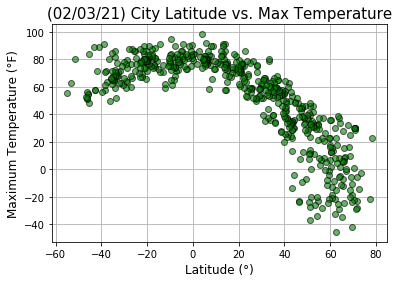

In [262]:
#getting the date
dt =  date.today().strftime("%m/%d/%y")
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']*9/5-459.67
plot_title = f'({dt}) City Latitude vs. '
figure_title = '.\output_data\Temperature.png'
plot_latitude(x_values,y_values,'Maximum Temperature (°F)', plot_title+'Max Temperature',figure_title)

## Latitude vs. Humidity Plot

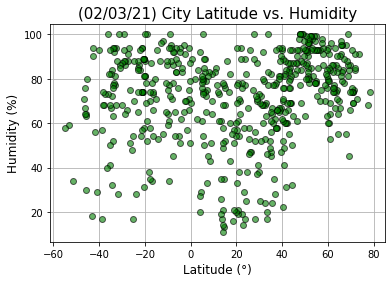

In [207]:
parameter = 'Humidity'
figure_title = f'.\output_data\{parameter}.png'
plot_latitude(x_values,clean_city_data[parameter],parameter+' (%)', plot_title+parameter, figure_title)

## Latitude vs. Cloudiness Plot

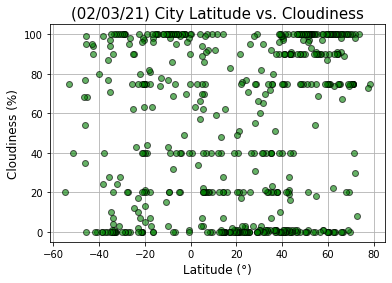

In [208]:
parameter = 'Cloudiness'
figure_title = f'.\output_data\{parameter}.png'
plot_latitude(x_values,clean_city_data[parameter],parameter+' (%)', plot_title+parameter, figure_title)

## Latitude vs. Wind Speed Plot

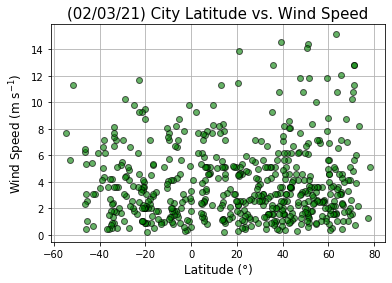

In [209]:
parameter = 'Wind Speed'
figure_title = f'.\output_data\{parameter}.png'
plot_latitude(x_values,clean_city_data[parameter],parameter+' (m s$^{-1}$)', plot_title+parameter, figure_title)

## Linear Regression

In [241]:
#sorting the dataframe by latitude values
clean_city_data = clean_city_data.sort_values(by='Lat', ascending=False,ignore_index=True).reset_index(drop=True)
# creating a Northern and Southern Emisphere Dataframe
sidx = np.array(np.where(clean_city_data['Lat'] > 0)).ravel()
nidx = np.array(np.where(clean_city_data['Lat'] <= 0)).ravel()
southern_df = clean_city_data.drop(sidx).reset_index(drop=True)
northern_df = clean_city_data.drop(nidx).reset_index(drop=True)


555
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 24

,level_0,index,City,Lon,Lat,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,378,381,São Gabriel da Cachoeira,-67.0892,-0.1303,302.15,79,75,2.57,BR,1612381519
1,379,274,Tucumã,-50.0500,-0.1833,300.36,87,90,3.29,BR,1612381498
2,380,21,Caucayá,-74.7819,-0.1934,305.73,51,100,0.60,CO,1612381455
3,381,23,Hithadhoo,73.0833,-0.6000,301.57,71,98,2.81,MV,1612381228
4,382,93,Salinópolis,-47.3561,-0.6136,301.46,75,1,5.17,BR,1612381250


In [242]:
southern_df

,level_0,index,City,Lon,Lat,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,378,381,São Gabriel da Cachoeira,-67.0892,-0.1303,302.15,79,75,2.57,BR,1612381519
1,379,274,Tucumã,-50.0500,-0.1833,300.36,87,90,3.29,BR,1612381498
2,380,21,Caucayá,-74.7819,-0.1934,305.73,51,100,0.60,CO,1612381455
3,381,23,Hithadhoo,73.0833,-0.6000,301.57,71,98,2.81,MV,1612381228
4,382,93,Salinópolis,-47.3561,-0.6136,301.46,75,1,5.17,BR,1612381250
...,...,...,...,...,...,...,...,...,...,...,...
172,550,98,Kaitangata,169.8464,-46.2817,286.48,64,77,6.26,NZ,1612381236
173,551,30,Bluff,168.3333,-46.6000,284.45,71,68,6.50,NZ,1612381232
174,552,537,Río Gallegos,-69.2181,-51.6226,300.15,34,40,11.32,AR,1612381550
175,553,41,Punta Arenas,-70.9167,-53.1500,290.15,59,75,5.66,CL,1612381238


In [243]:
northern_df

,level_0,index,City,Lon,Lat,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,52,Longyearbyen,15.6401,78.2186,268.15,74,75,5.14,SJ,1612381275
1,1,1,Qaanaaq,-69.3632,77.4840,243.43,68,73,1.25,GL,1612381239
2,2,45,Dikson,80.5464,73.5069,253.78,91,100,8.19,RU,1612381246
3,3,85,Upernavik,-56.1549,72.7868,247.35,71,8,2.21,GL,1612381231
4,4,128,Khatanga,102.5000,71.9667,252.16,91,100,3.92,RU,1612381247
...,...,...,...,...,...,...,...,...,...,...,...
373,373,80,Butaritari,172.7902,3.0707,300.63,84,34,7.68,KI,1612381245
374,374,312,Boa Vista,-60.6733,2.8197,303.15,62,75,6.17,BR,1612381506
375,375,460,Mogadishu,45.3438,2.0371,297.95,80,63,9.30,SO,1612381446
376,376,472,Muisne,-80.0333,0.6000,302.15,89,40,4.12,EC,1612381538


In [303]:
def linear_regression(x_values,y_values, y_name, title):
    correlation = pearsonr(x_values,y_values)
    figtitle = f'.\output_data\{title}.png'
    dt = date.today().strftime("%m/%d/%y")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, alpha = 0.5)
    plt.ylabel(y_name, fontsize=(12))
    plt.xlabel('Latitude (°)',fontsize=(12))
    plt.title(title+dt,fontsize=(15))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.mean(),y_values.mean()+20),fontsize=15,color="red")
    plt.xlabel('Latitude (°)')
    plt.ylabel(y_name)
    plt.savefig(figtitle)
    print(f"The r-squared is: {rvalue**2:.2f} \nPearson Correlation coefficient is {correlation[0]:.2f}")
    plt.show()
    return

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.73 
Pearson Correlation coefficient is -0.86


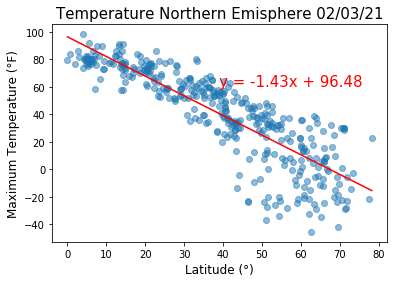

In [304]:
parameter = 'Temperature'
n_title = f'{parameter} Northern Emisphere '

linear_regression(northern_df['Lat'],northern_df['Max Temp']*9/5-459.67,'Maximum Temperature (°F)',n_title)
#x_values=northern_df['Lat']
#y_values=northern_df['Max Temp']


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.27 
Pearson Correlation coefficient is 0.52


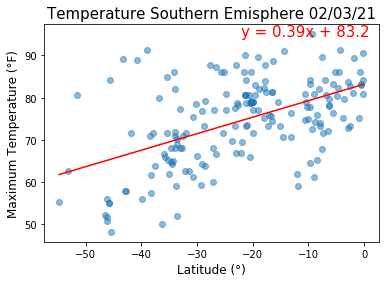

In [305]:
n_title = f'{parameter} Southern Emisphere '
linear_regression(southern_df['Lat'],southern_df['Max Temp']*9/5-459.67,'Maximum Temperature (°F)',n_title)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16 
Pearson Correlation coefficient is 0.40


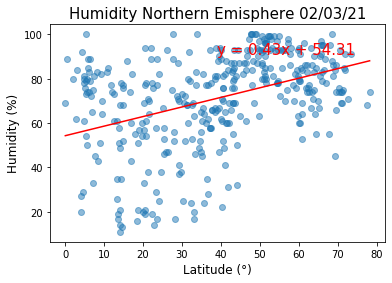

In [306]:
parameter = 'Humidity'
n_title = f'{parameter} Northern Emisphere '

linear_regression(northern_df['Lat'],northern_df[parameter],f'{parameter} (%)',n_title)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03 
Pearson Correlation coefficient is 0.19


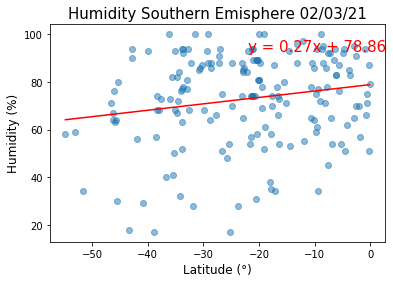

In [307]:
n_title = f'{parameter} Southern Emisphere '
linear_regression(southern_df['Lat'],southern_df[parameter],f'{parameter} (%)',n_title)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12 
Pearson Correlation coefficient is 0.35


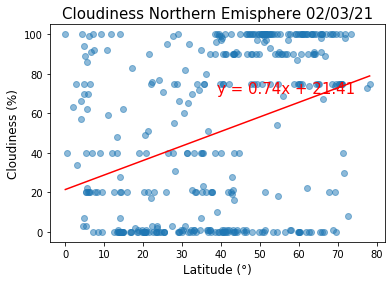

In [308]:
parameter = 'Cloudiness'
n_title = f'{parameter} Northern Emisphere '

linear_regression(northern_df['Lat'],northern_df[parameter],f'{parameter} (%)',n_title)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05 
Pearson Correlation coefficient is 0.23


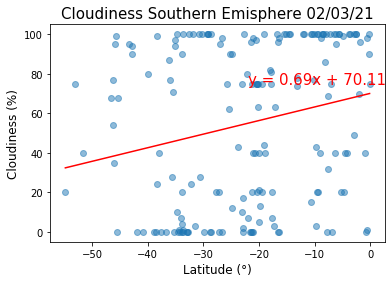

In [309]:
n_title = f'{parameter} Southern Emisphere '
linear_regression(southern_df['Lat'],southern_df[parameter],f'{parameter} (%)',n_title)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00 
Pearson Correlation coefficient is 0.04


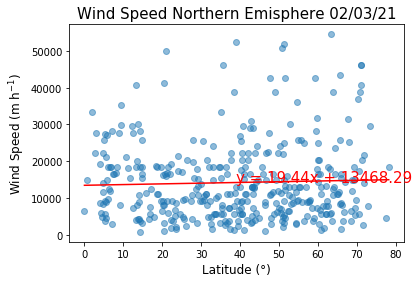

In [310]:
parameter = 'Wind Speed'
n_title = f'{parameter} Northern Emisphere '

linear_regression(northern_df['Lat'],northern_df[parameter]*3600,parameter+' (m h$^{-1}$)',n_title)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02 
Pearson Correlation coefficient is -0.12


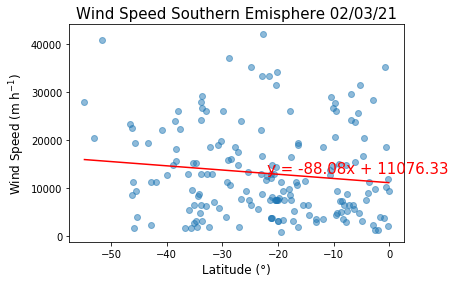

In [311]:
n_title = f'{parameter} Southern Emisphere '
linear_regression(southern_df['Lat'],southern_df[parameter]*3600,parameter+' (m h$^{-1}$)',n_title)

# Observations

1. There is a good negative correlation between temperature and Latitude in the northern emisphere. Pearson coefficient of -0.86.
2. The correlation between temperature and latitude in the south emisphere is positive but it is less strong than in the northern since the pearson correlation coefficient is only 0.52.
3. There is no correlation between cloudiness or wind speed and Latitude in either emispheres.